In [1]:
import pandas as pd

path_311 = "data/extract.csv"
path_nta = "data/Neighborhood Tabulation Areas.geojson"
path_nta_population = "data/New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv"

In [2]:
df_311 = pd.read_csv(path_311)
df_nta_population = pd.read_csv(path_nta_population)

/home/julien/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's take a look at the unique columns:

In [3]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

Some columns are specific to certain complaint types: **Landmark**, **Park Facility Name**, **Vehicle Type**, **Taxi Company Borough**, **Taxi Pick Up Location**, **Bridge Highway Name**, **Bridge Highway Direction**, **Road Ramp**, **Bridge Highway Segment**. If those fields are empty for most complaints, we might as well drop the corresponding columns.

In [4]:
df_311

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,24309212,11/03/2012 12:00:00 AM,11/07/2012 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10075,308 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773824,-73.954111,"(40.77382381576739, -73.95411117806607)"
1,21430983,09/13/2011 08:40:00 AM,09/13/2011 01:30:00 PM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38035027,12/28/2017 08:40:46 AM,12/29/2017 11:49:46 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10467,3377 WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874872,-73.867060,"(40.87487170961045, -73.86706003035614)"
3,16381552,04/04/2010 11:25:55 PM,04/08/2010 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Debris - Falling Or In Danger Of Falling,NaN,10009,225 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729061,-73.978287,"(40.72906133724778, -73.9782869065312)"
4,40325299,09/19/2018 01:02:40 PM,09/19/2018 03:41:45 PM,DOF,Adjudication - Hearing by Mail,DOF Parking - Request Copy,Image of Ticket,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,22711487,02/14/2012 10:49:00 AM,02/14/2012 10:49:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,40697304,10/30/2018 04:25:15 PM,10/30/2018 08:36:36 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11416,97-34 103 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687406,-73.840625,"(40.68740553771981, -73.84062484131611)"
19997,26916535,12/19/2013 12:00:00 AM,12/24/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10452,1045 ANDERSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833375,-73.926353,"(40.8333754661446, -73.92635316005534)"
19998,43897030,09/26/2019 07:27:13 PM,10/15/2019 09:14:28 AM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,11213,1417 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673216,-73.929793,"(40.6732161711646, -73.92979254543171)"


### Complaints

In [5]:
df_311["Complaint Type"].describe()

count                   20000
unique                    207
top       Noise - Residential
freq                     1697
Name: Complaint Type, dtype: object

In [6]:
complaints = df_311["Complaint Type"].unique().tolist()
complaints.sort()
print(complaints)

['./validate_form.php', 'APPLIANCE', 'Abandoned Vehicle', 'Advocate - Other', 'Advocate-Personal Exemptions', 'Advocate-Prop Refunds/Credits', 'Air Quality', "Alzheimer's Care", 'Animal Abuse', 'Animal in a Park', 'Animal-Abuse', 'Asbestos', 'BEST/Site Safety', 'Beach/Pool/Sauna Complaint', 'Benefit Card Replacement', 'Bike Rack Condition', 'Bike/Roller/Skate Chronic', 'Blocked Driveway', 'Boilers', 'Borough Office', 'Bridge Condition', 'Broken Muni Meter', 'Broken Parking Meter', 'Building Marshals office', 'Building/Use', 'Bus Stop Shelter Complaint', 'Bus Stop Shelter Placement', 'CONSTRUCTION', 'Construction', 'Construction Safety Enforcement', 'Consumer Complaint', 'Cranes and Derricks', 'Curb Condition', 'DCA / DOH New License Application Request', 'DEP Street Condition', 'DHS Advantage - Tenant', 'DHS Advantage - Third Party', 'DHS Advantage -Landlord/Broker', 'DOF Parking - DMV Clearance', 'DOF Parking - Payment Issue', 'DOF Parking - Request Copy', 'DOF Parking - Request Statu

One entry has to be removed: './validate_form.php'. Should check for other outliers in the full dataset.

In [7]:
complaint_count = df_311.groupby("Complaint Type") \
                        .count()["Unique Key"] \
                        .sort_values(ascending=False) 
      
complaint_count.plot.barh(x="Complaint Type", y="Unique Key", logx=True, figsize=(15, 40));

Let's look at the top 30 complaints:

In [8]:
complaint_count[:30]

Complaint Type
Noise - Residential                    1697
HEAT/HOT WATER                         1077
Street Condition                        871
Street Light Condition                  868
Illegal Parking                         857
HEATING                                 805
Blocked Driveway                        782
PLUMBING                                645
Water System                            564
GENERAL CONSTRUCTION                    458
Noise                                   452
General Construction/Plumbing           434
Noise - Street/Sidewalk                 428
Traffic Signal Condition                415
UNSANITARY CONDITION                    376
Sewer                                   331
Dirty Conditions                        314
PAINT/PLASTER                           309
Noise - Commercial                      303
PAINT - PLASTER                         292
ELECTRIC                                285
Damaged Tree                            273
Request Large Bul

As we can see, some complaints are redundant and should be grouped. (HEATING, PAINT/PLASTER)

### Timestamps

In [9]:
df_311["Created Date"] = pd.to_datetime(df_311["Created Date"])
df_311["Closed Date"] = pd.to_datetime(df_311["Closed Date"])

In [10]:
df_311

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,24309212,2012-11-03 00:00:00,2012-11-07 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10075,308 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773824,-73.954111,"(40.77382381576739, -73.95411117806607)"
1,21430983,2011-09-13 08:40:00,2011-09-13 13:30:00,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38035027,2017-12-28 08:40:46,2017-12-29 11:49:46,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10467,3377 WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874872,-73.867060,"(40.87487170961045, -73.86706003035614)"
3,16381552,2010-04-04 23:25:55,2010-04-08 00:00:00,DOB,Department of Buildings,General Construction/Plumbing,Debris - Falling Or In Danger Of Falling,NaN,10009,225 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729061,-73.978287,"(40.72906133724778, -73.9782869065312)"
4,40325299,2018-09-19 13:02:40,2018-09-19 15:41:45,DOF,Adjudication - Hearing by Mail,DOF Parking - Request Copy,Image of Ticket,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,22711487,2012-02-14 10:49:00,2012-02-14 10:49:00,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,40697304,2018-10-30 16:25:15,2018-10-30 20:36:36,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11416,97-34 103 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687406,-73.840625,"(40.68740553771981, -73.84062484131611)"
19997,26916535,2013-12-19 00:00:00,2013-12-24 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10452,1045 ANDERSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833375,-73.926353,"(40.8333754661446, -73.92635316005534)"
19998,43897030,2019-09-26 19:27:13,2019-10-15 09:14:28,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,11213,1417 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673216,-73.929793,"(40.6732161711646, -73.92979254543171)"


In [11]:
years = df_311["Created Date"].apply(lambda d: d.year).rename("cyear")

In [12]:
years

0        2012
1        2011
2        2017
3        2010
4        2018
         ... 
19995    2012
19996    2018
19997    2013
19998    2019
19999    2016
Name: cyear, Length: 20000, dtype: int64

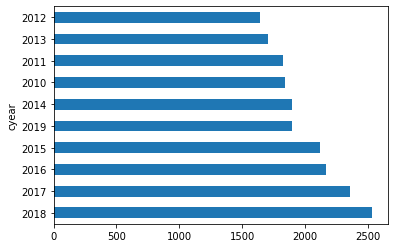

In [13]:
years.groupby(years) \
     .count() \
     .sort_values(ascending=False) \
     .plot.barh(x="cyear", y="Count");

Values were randomly sampled so there is a margin of error, and 2019 is not over, but it seems like there is a linear increase in the number of 311 requests - the service gets more popular.

### Location

In [14]:
df_311[df_311["Location"].isna()].iloc[0]

Unique Key                                                                 21430983
Created Date                                                    2011-09-13 08:40:00
Closed Date                                                     2011-09-13 13:30:00
Agency                                                                          DOT
Agency Name                                            Department of Transportation
Complaint Type                                             Traffic Signal Condition
Descriptor                                                               Controller
Location Type                                                                   NaN
Incident Zip                                                                    NaN
Incident Address                                                                NaN
Street Name                                                                     NaN
Cross Street 1                                                         EAST 

In [15]:
df_311["Incident Zip"].describe()

count     18849.0
unique      381.0
top       11226.0
freq        265.0
Name: Incident Zip, dtype: float64

In [16]:
df_311[df_311["Incident Zip"].isna()].iloc[0]

Unique Key                                                                 21430983
Created Date                                                    2011-09-13 08:40:00
Closed Date                                                     2011-09-13 13:30:00
Agency                                                                          DOT
Agency Name                                            Department of Transportation
Complaint Type                                             Traffic Signal Condition
Descriptor                                                               Controller
Location Type                                                                   NaN
Incident Zip                                                                    NaN
Incident Address                                                                NaN
Street Name                                                                     NaN
Cross Street 1                                                         EAST 

Depending on the type of complaint, location might be undefined (traffic light at intersection, literature request).

In [17]:
df_311[~(df_311["Incident Zip"].isna())]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,24309212,2012-11-03 00:00:00,2012-11-07 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10075,308 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773824,-73.954111,"(40.77382381576739, -73.95411117806607)"
2,38035027,2017-12-28 08:40:46,2017-12-29 11:49:46,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10467,3377 WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874872,-73.867060,"(40.87487170961045, -73.86706003035614)"
3,16381552,2010-04-04 23:25:55,2010-04-08 00:00:00,DOB,Department of Buildings,General Construction/Plumbing,Debris - Falling Or In Danger Of Falling,NaN,10009,225 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729061,-73.978287,"(40.72906133724778, -73.9782869065312)"
5,26616725,2013-11-03 10:33:50,2013-11-03 14:43:39,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10128,1658 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.783116,-73.950859,"(40.78311615247708, -73.95085852586666)"
6,31691817,2015-10-06 19:09:13,2015-10-15 12:02:39,HPD,Department of Housing Preservation and Develop...,WATER LEAK,HEAVY FLOW,RESIDENTIAL BUILDING,10460,861 EAST 181 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.846209,-73.882648,"(40.84620922816984, -73.88264831394402)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,16318016,2010-03-27 00:00:00,2010-07-08 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,11233,21A SOMERS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678614,-73.912442,"(40.67861422823729, -73.9124417788862)"
19996,40697304,2018-10-30 16:25:15,2018-10-30 20:36:36,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11416,97-34 103 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687406,-73.840625,"(40.68740553771981, -73.84062484131611)"
19997,26916535,2013-12-19 00:00:00,2013-12-24 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10452,1045 ANDERSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833375,-73.926353,"(40.8333754661446, -73.92635316005534)"
19998,43897030,2019-09-26 19:27:13,2019-10-15 09:14:28,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,11213,1417 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673216,-73.929793,"(40.6732161711646, -73.92979254543171)"


In [18]:
df_311[~(df_311["Longitude"].isna())]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,24309212,2012-11-03 00:00:00,2012-11-07 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10075,308 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773824,-73.954111,"(40.77382381576739, -73.95411117806607)"
2,38035027,2017-12-28 08:40:46,2017-12-29 11:49:46,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10467,3377 WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874872,-73.867060,"(40.87487170961045, -73.86706003035614)"
3,16381552,2010-04-04 23:25:55,2010-04-08 00:00:00,DOB,Department of Buildings,General Construction/Plumbing,Debris - Falling Or In Danger Of Falling,NaN,10009,225 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729061,-73.978287,"(40.72906133724778, -73.9782869065312)"
5,26616725,2013-11-03 10:33:50,2013-11-03 14:43:39,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10128,1658 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.783116,-73.950859,"(40.78311615247708, -73.95085852586666)"
6,31691817,2015-10-06 19:09:13,2015-10-15 12:02:39,HPD,Department of Housing Preservation and Develop...,WATER LEAK,HEAVY FLOW,RESIDENTIAL BUILDING,10460,861 EAST 181 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.846209,-73.882648,"(40.84620922816984, -73.88264831394402)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,16318016,2010-03-27 00:00:00,2010-07-08 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,11233,21A SOMERS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678614,-73.912442,"(40.67861422823729, -73.9124417788862)"
19996,40697304,2018-10-30 16:25:15,2018-10-30 20:36:36,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11416,97-34 103 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687406,-73.840625,"(40.68740553771981, -73.84062484131611)"
19997,26916535,2013-12-19 00:00:00,2013-12-24 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10452,1045 ANDERSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833375,-73.926353,"(40.8333754661446, -73.92635316005534)"
19998,43897030,2019-09-26 19:27:13,2019-10-15 09:14:28,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,11213,1417 PROSPECT PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673216,-73.929793,"(40.6732161711646, -73.92979254543171)"


We do have the exact location for most of the requests (>80%).

Note that **X Coordinate (State Plane)** / **Y Coordinate (State Plane)** might be more precise than **Longitude** / **Latitude**.

### Request origin

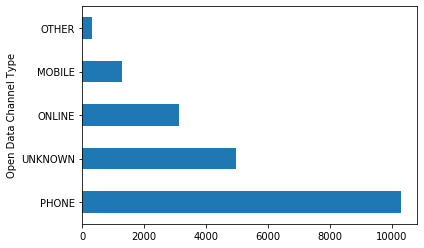

In [19]:
channel_count = df_311.groupby("Open Data Channel Type") \
                        .count()["Unique Key"] \
                        .sort_values(ascending=False) 
      
channel_count.plot.barh(x="Channel", y="Count");

Most requests are still submitted through a phone call.

### Focus on certain complaints

Let's look again at the top 30 complaints:

In [20]:
complaint_count[:30]

Complaint Type
Noise - Residential                    1697
HEAT/HOT WATER                         1077
Street Condition                        871
Street Light Condition                  868
Illegal Parking                         857
HEATING                                 805
Blocked Driveway                        782
PLUMBING                                645
Water System                            564
GENERAL CONSTRUCTION                    458
Noise                                   452
General Construction/Plumbing           434
Noise - Street/Sidewalk                 428
Traffic Signal Condition                415
UNSANITARY CONDITION                    376
Sewer                                   331
Dirty Conditions                        314
PAINT/PLASTER                           309
Noise - Commercial                      303
PAINT - PLASTER                         292
ELECTRIC                                285
Damaged Tree                            273
Request Large Bul

Things that stand out: 
- Noise most recurrent complaint, different types of noise
- Followed by Water / Heating systems / Plumbing / Sewer
- Things that refer to the bad condition of something: Street Condition, Street Light Condition, Traffic Signal Condition, Unsanitary conditions, Dirty Conditions, Sanitation Condition, Sidewalk Condition and many more

### Analysis ideas

List of things that could be done:
- Per Neighborhood Tabulation Area (NTA): Top 30 Problems, frequency w.r.t the size of the NTA, look into trends
- Average time to resolution over the years (compare NTAs, agencies)
- Word cloud per NTA
- How well prepared for / resistent to external events, such as blizzards

Problem: missing something interesting, that goes beyond the simple analysis. Make use of another dataset? Do something for social good: either help agencies fix their problems more efficiently (redraw borders of NTAs, encourage communication between departments), or give people some advice (Fix your heating system before the winter, because there is a high probability of failure - Do you really want to move to that neighborhood? It has a couple of problems, here is a better one, which is much more silent). 

# Add NTA information to complaints

In [59]:
%matplotlib inline

import json
import math
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import shape, Point

In [136]:
# load GeoJSON file containing NTAs
with open(path_nta) as f:
    js = json.load(f)

def get_nta(location_str):
    """Retrieves the NTA of a given location in NYC.
    Args:
        location_str (String): location associated to the complaint, that is '(latitude, longitude)'
    Returns:
        String: code of the NTA the location is part of, or NaN if the location is not within an NTA
    """
    location = eval(location_str)
    latitude = location[0]
    longitude = location[1]
    point = Point(longitude, latitude)
    for feature in js["features"]:
        polygon = shape(feature["geometry"])
        if polygon.contains(point):
            nta_code = feature["properties"]["ntacode"]
            return nta_code
    return np.nan
    
get_nta('(40.77382381576739,-73.95411117806607)')

'MN32'

In [25]:
df_311["NTA"] = np.nan
df_311.loc[df_311.Location.notnull(), "NTA"] = df_311.Location[df_311.Location.notnull()].apply(get_nta)

In [26]:
print(f"Added the NTA to {df_311.NTA.notnull().sum()} complaints")

Added the NTA to 18142 complaints


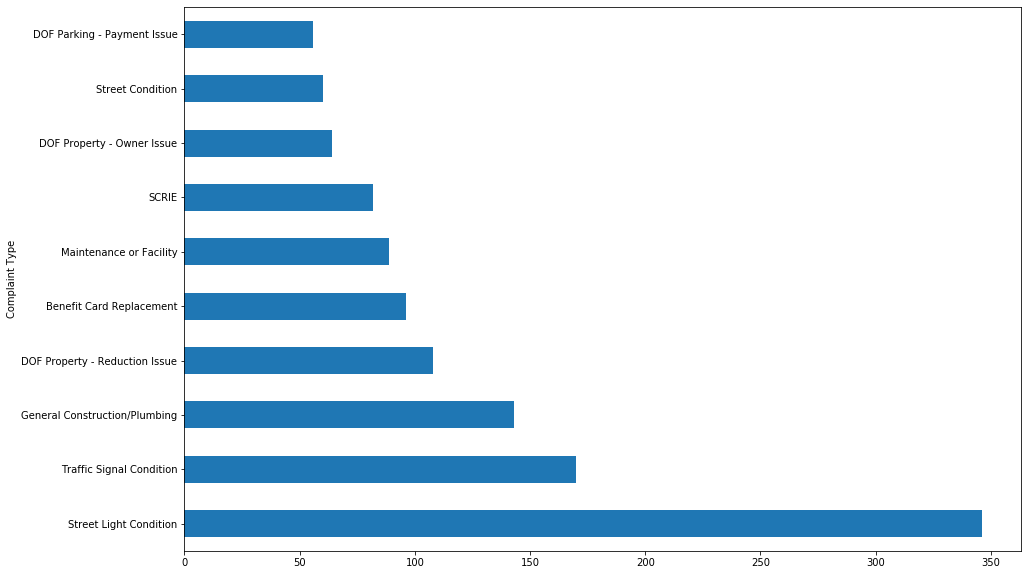

In [27]:
no_loc_complaints = df_311[df_311.NTA.isnull()]
complaint_count = no_loc_complaints.groupby("Complaint Type") \
                                   .count()["Unique Key"] \
                                   .sort_values(ascending=False) 
      
complaint_count.head(10).plot.barh(x="Complaint Type", y="Count", figsize=(15, 10));

**Street Lights** / **Traffic Signal** are often at intersections, which don't have an exact address. We also have complaints which don't refer to a specific location such as **Benefit Card Replacement**. We might have to watch out for **Street Light Condition** complaints, because they also are among the most frequent complaints in the raw dataset.

# Analyse noise based on time of the day

## Filter noise complaints

In [28]:
complaints_lowercase = list(map(lambda x: (x, x.lower()), complaints))
noise_complaint_types = [complaint[0] for complaint in complaints_lowercase if "noise" in complaint[1]]
print(noise_complaint_types)

['Noise', 'Noise - Commercial', 'Noise - Helicopter', 'Noise - House of Worship', 'Noise - Park', 'Noise - Residential', 'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Noise Survey']


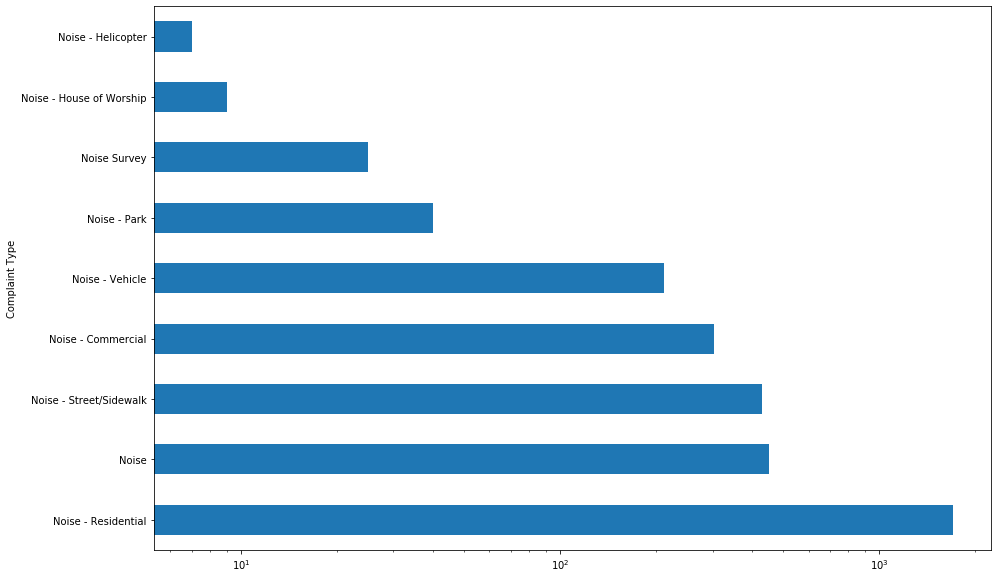

In [29]:
noise_complaints = df_311[df_311["Complaint Type"].isin(noise_complaint_types)]
complaint_count = noise_complaints.groupby("Complaint Type") \
                                  .count()["Unique Key"] \
                                  .sort_values(ascending=False) 
      
complaint_count.plot.barh(x="Complaint Type", y="Unique Key", logx=True, figsize=(15, 10));

In [30]:
sorted_requests = "data/311_Service_Requests_from_2010_to_Present_sorted.csv"

In [51]:
from datetime import datetime

start = datetime(2019, 8, 5)
end = datetime(2019, 10, 21)

In [52]:
names = df_311.columns.tolist()[:-1]
sorted_df = pd.read_csv(sorted_requests, header=None, names=names, nrows=500000)
sorted_df = sorted_df[sorted_df["Complaint Type"].isin(noise_complaint_types)]
sorted_df["Created Date"] = pd.to_datetime(sorted_df["Created Date"])
sorted_df = sorted_df[(start <= sorted_df["Created Date"]) & (sorted_df["Created Date"] < end)]

In [74]:
sorted_df["Created Day"] = sorted_df["Created Date"].dt.date
sorted_df["Created Hour"] = sorted_df["Created Date"].dt.hour
sorted_df["Created Weekday"] = sorted_df["Created Date"].dt.dayofweek

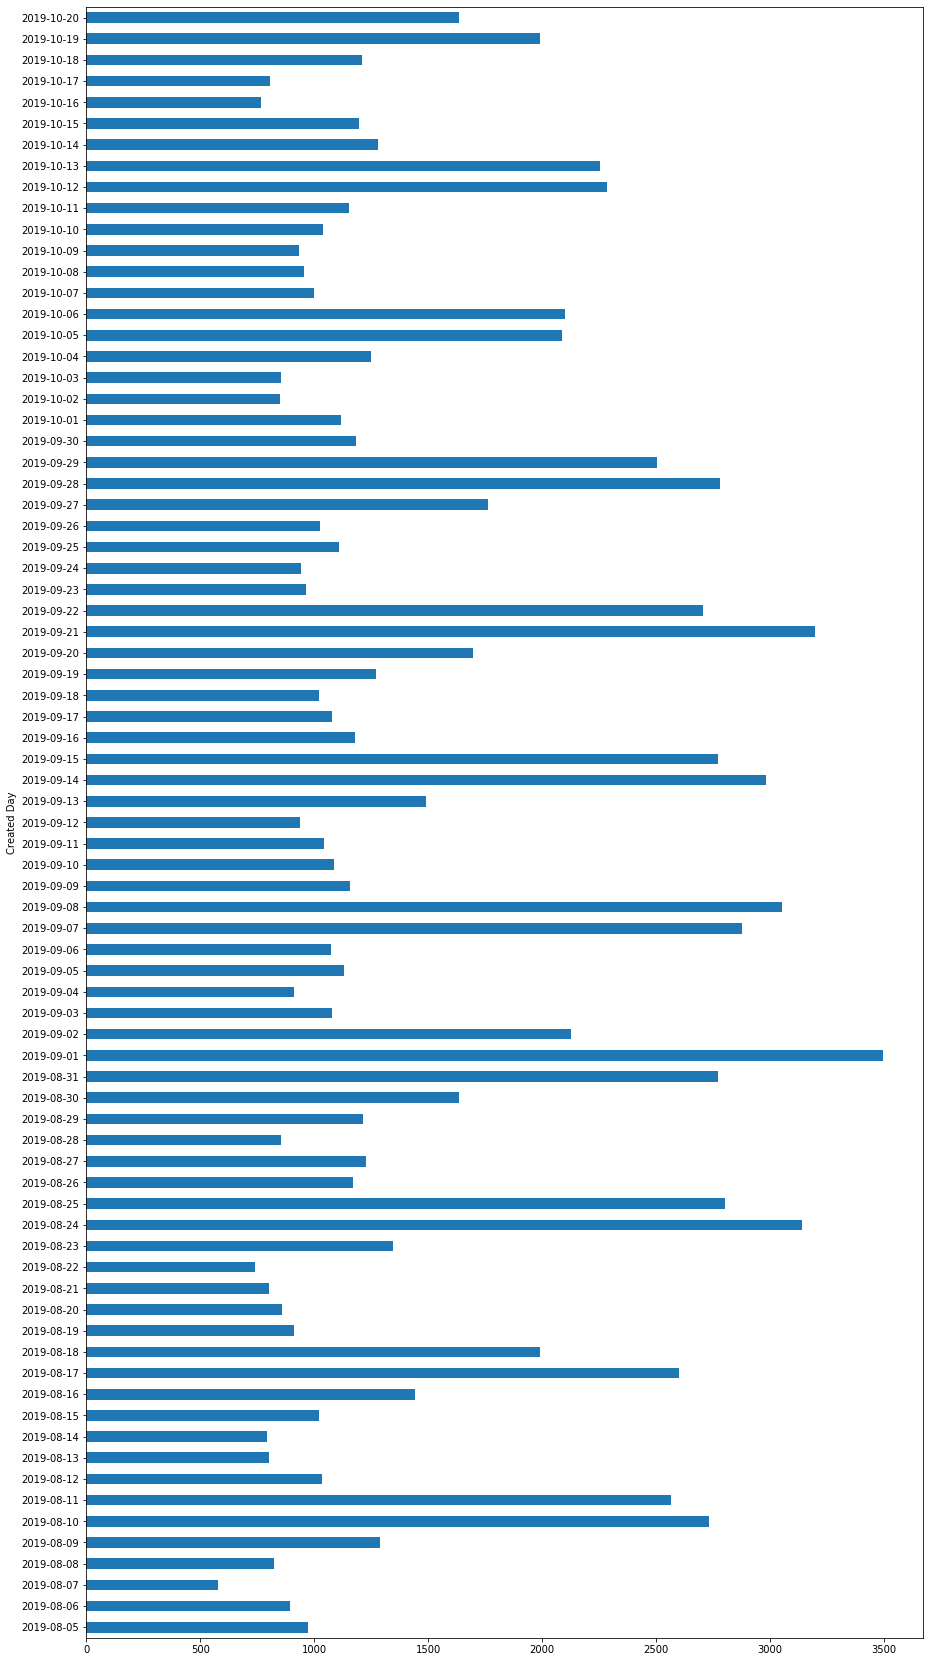

In [75]:
daily_complaints = sorted_df.groupby("Created Day")["Created Day"] \
                            .count()
    
daily_complaints.plot.barh(figsize=(15,30));

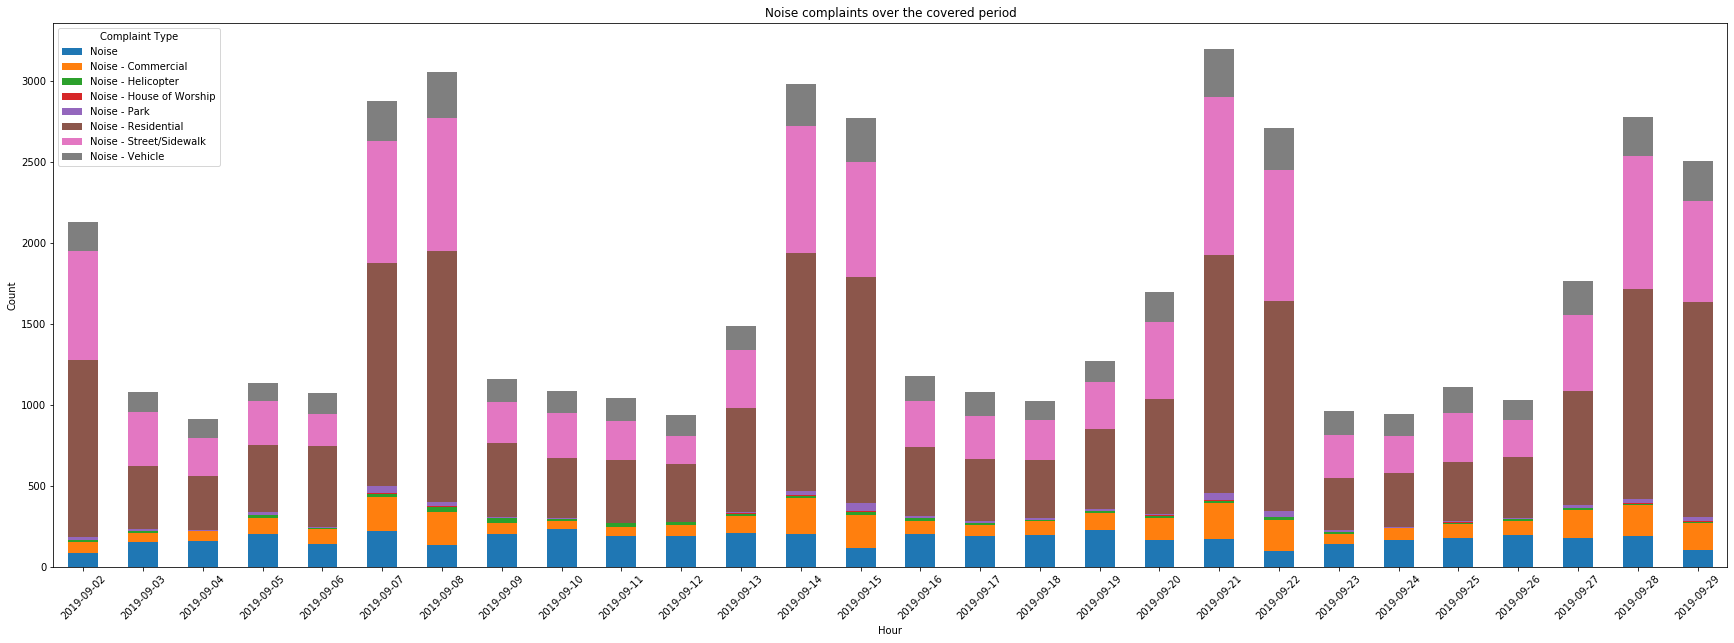

In [76]:
month_start = datetime(2019, 9, 2)
month_end = datetime(2019, 9, 30)

daily_complaints = sorted_df[(month_start <= sorted_df["Created Date"]) & (sorted_df["Created Date"] < month_end)] \
                            .groupby(['Created Day', 'Complaint Type'])['Created Day'] \
                            .count() \
                            .unstack('Complaint Type') \
                            .fillna(0)

ax = daily_complaints.plot(kind='bar', stacked=True, figsize=(30,10), rot=45)
ax.set_title("Noise complaints over the covered period")
ax.set_xlabel("Hour")
ax.set_ylabel("Count");

Seasonality is obvious, there is a weekly pattern, with a peak in noise complaints over the weekend. 

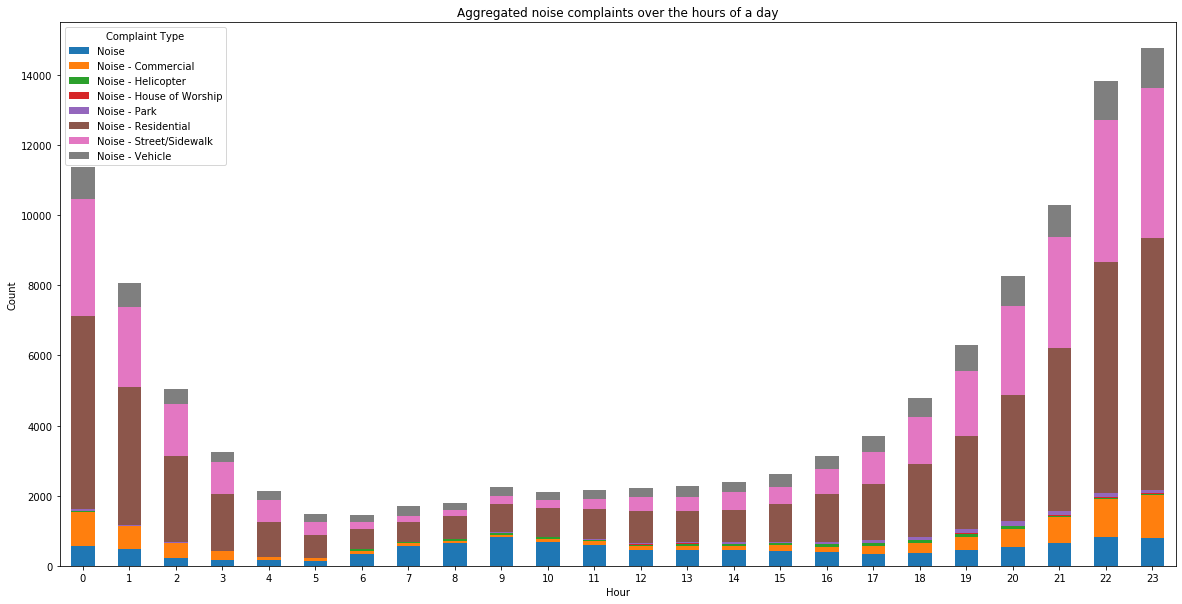

In [93]:
hourly_complaints = sorted_df.groupby(['Created Hour', 'Complaint Type'])['Created Hour'].count().unstack('Complaint Type').fillna(0)
ax = hourly_complaints.plot(kind='bar', stacked=True, figsize=(20,10), rot=0)
ax.set_title("Aggregated noise complaints over the hours of a day")
ax.set_xlabel("Hour")
ax.set_ylabel("Count");

There is also a daily pattern, with lots of noise complaints during the night. We might want to look at the pattern we get when aggregating based on the hour and the weekday, to see if there are differences and validate our current approach (disregard weekday). We expect to have a similar pattern every day, but with different numbers. 

In [109]:
hourly_complaints = sorted_df.groupby(['Created Weekday', 'Created Hour'])[['Unique Key']].count().reset_index()#.unstack('Complaint Type').fillna(0)  hourly_complaints
#ax = hourly_complaints.plot(kind='bar', stacked=True, figsize=(20,10), rot=0)
#ax.set_title("Aggregated noise complaints over the hours of a day")
#ax.set_xlabel("Hour")
#ax.set_ylabel("Count");

In [110]:
hourly_complaints

,Created Weekday,Created Hour,Unique Key
0,0,0,1520
1,0,1,845
2,0,2,544
3,0,3,305
4,0,4,236
...,...,...,...
163,6,19,1311
164,6,20,1634
165,6,21,1852
166,6,22,2305


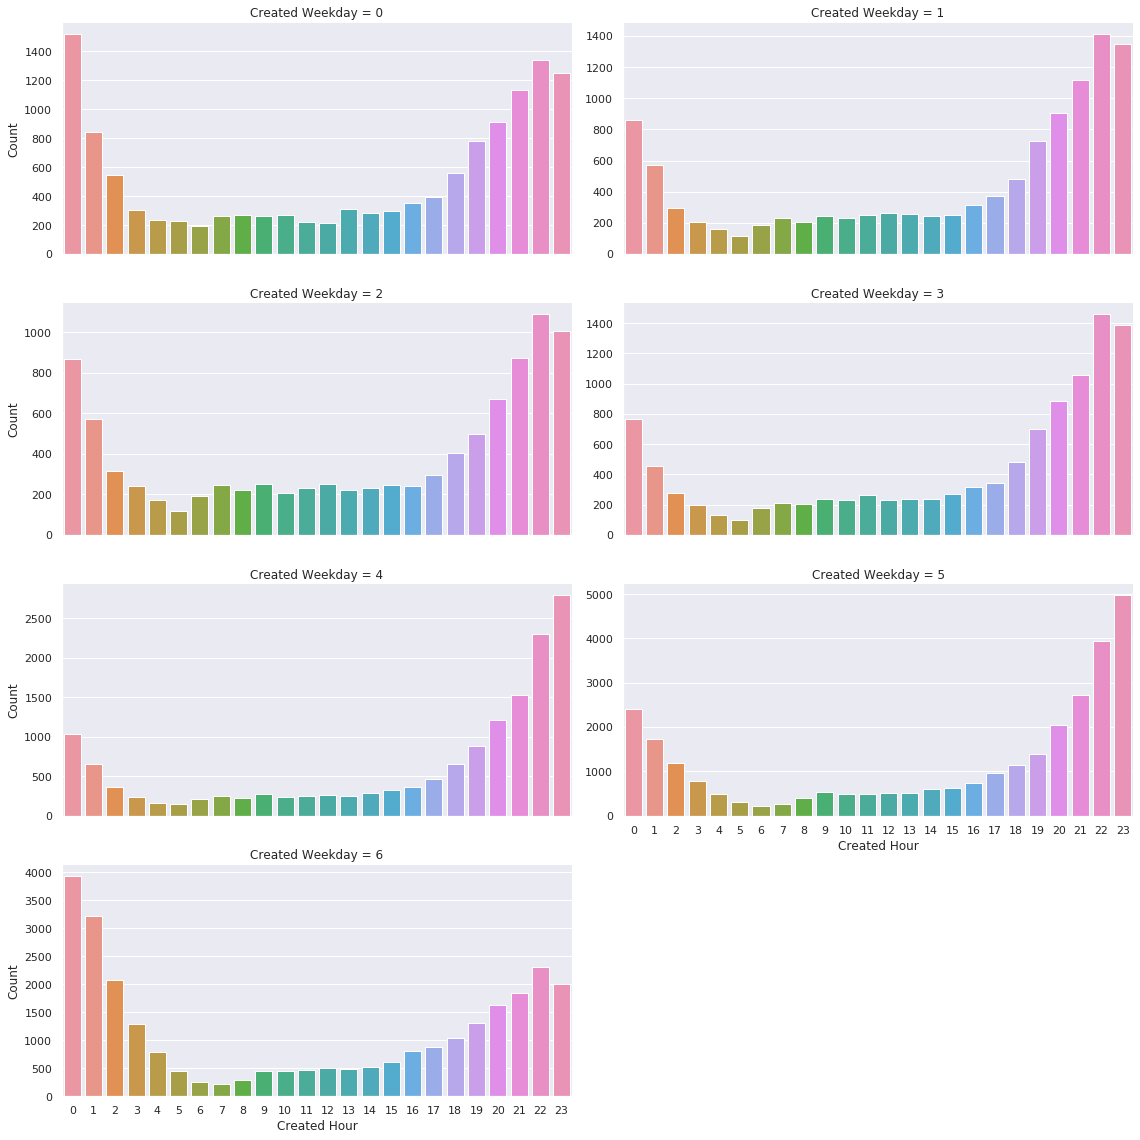

In [127]:
import seaborn as sns
sns.set()

g = sns.catplot(x='Created Hour', y='Unique Key', col='Created Weekday', data=hourly_complaints, kind='bar', col_wrap=2, sharey=False, height=4, aspect=2)
g = g.set_ylabels("Count")

Not really different shapes, there are just peaks on Friday and Saturday night that must be taken into account and have an effect on the last 3 plots. Question arises: Is it just party-related / nightly complaints that are responsible for the weekend peaks?

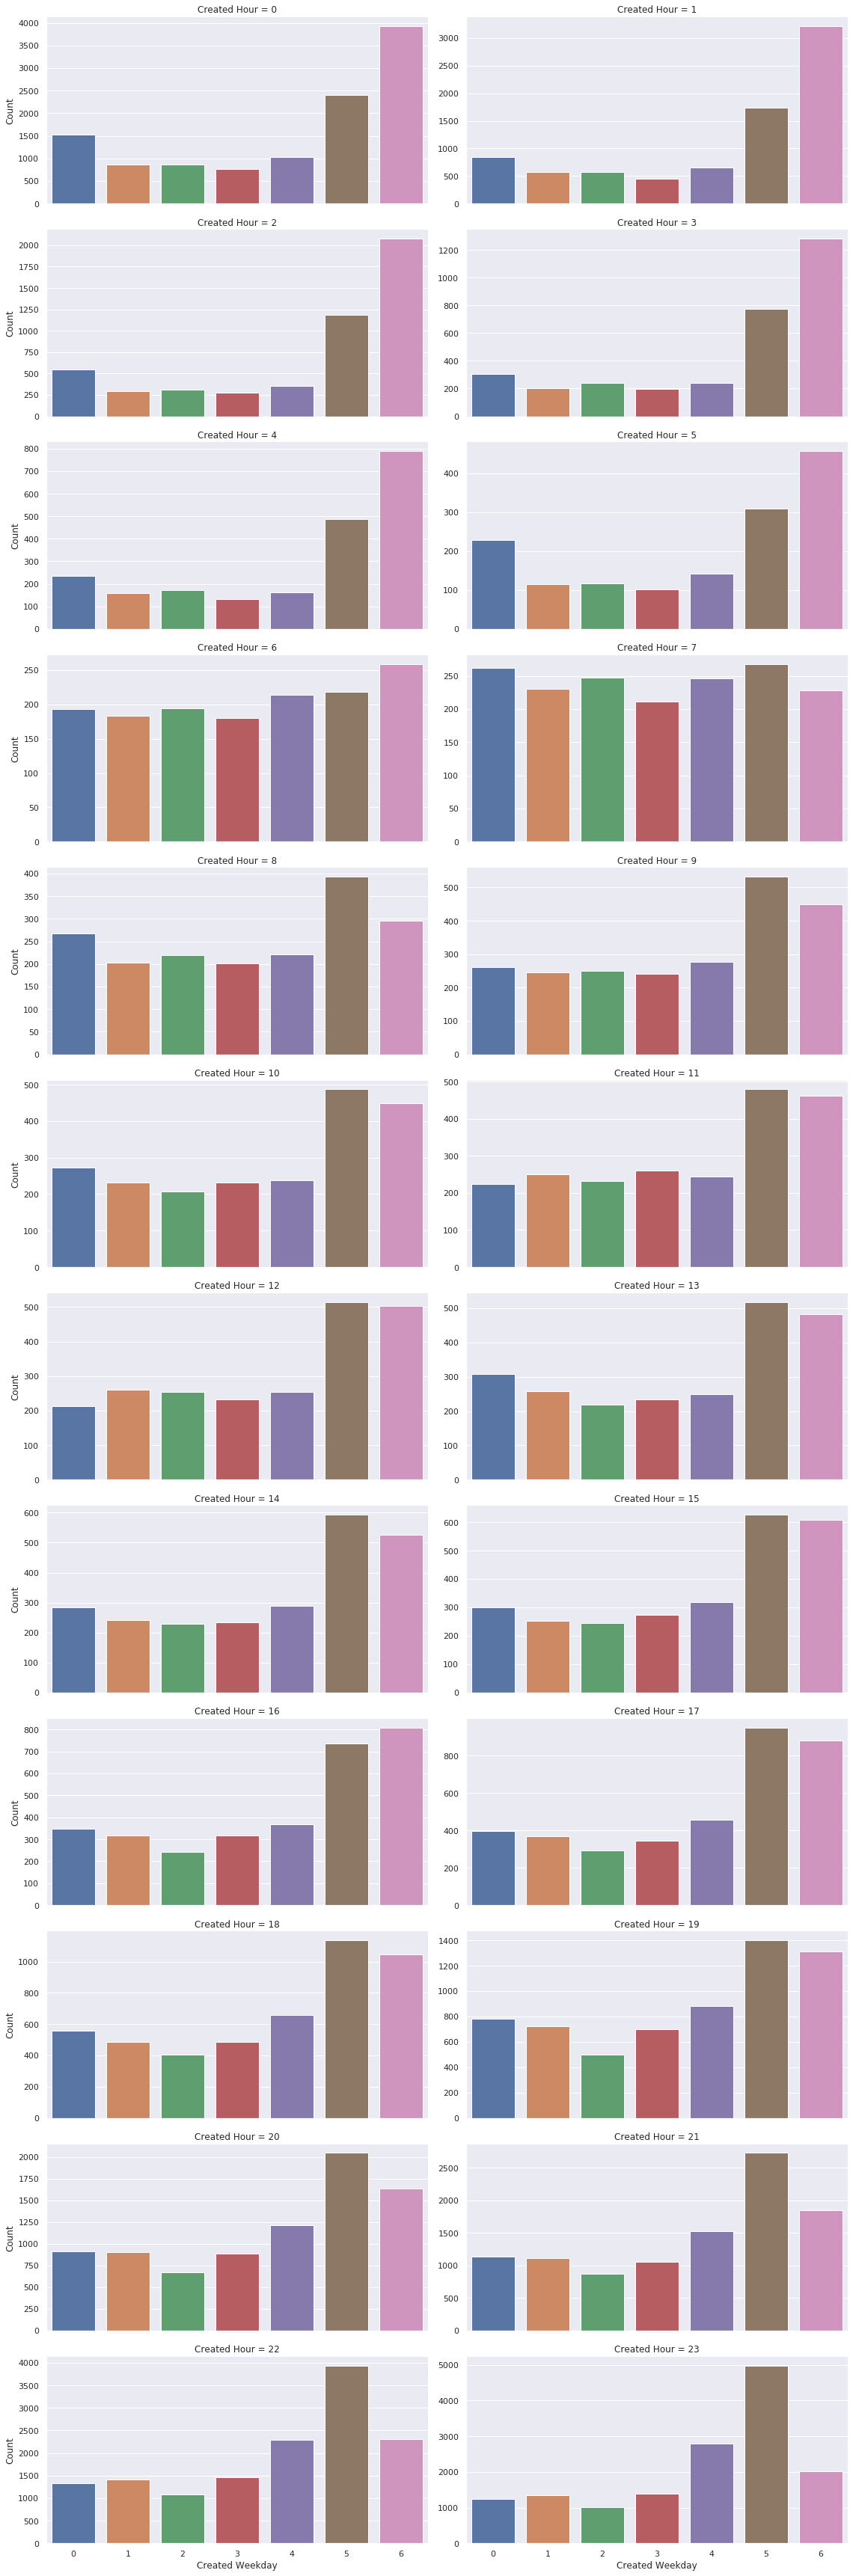

In [128]:
g = sns.catplot(x='Created Weekday', y='Unique Key', col='Created Hour', data=hourly_complaints, kind='bar', col_wrap=2, sharey=False, height=4, aspect=2)
g = g.set_ylabels("Count")

Not only are there more nighttime noise-complaints on the Weekend, there are also more daytime complaints, probably because people tend to be at home over the weekend, where they are more likely to be disturbed than at work. This is something that should also be taken into account when **reasoning about other types of complaints**, i. e. when interpretating a number of complaints we should always think about factors like the weekday, the hour, etc. 

## Comment on the plots

What can be done with noise:
- Provide general method to analyse seasonality, that can be used for any column
- Compute daily mean, then spot outliers 
- Compute hourly mean (weekday), then spot outliers
- Look at noise distribution across NTAs, normalise with NTA population

Noise seems to have quite a high variance, CIs wouldn't give much insights.

## Analyse noise based on location

We want to identify noisy NTAs.

In [137]:
sorted_df["NTA"] = np.nan
sorted_df.loc[sorted_df.Location.notnull(), "NTA"] = sorted_df.Location[sorted_df.Location.notnull()].apply(get_nta)

Load NTA population sizes:

In [194]:
nta_pop_df = pd.read_csv(path_nta_population)
nta_pop_df = nta_pop_df[nta_pop_df.Year == 2010].reset_index()

In [198]:
nta_complaints = sorted_df.groupby("NTA")[["Unique Key"]] \
                          .count() \
                          .rename(columns={"Unique Key": "Count"})

nta_complaints_extended = nta_complaints.merge(nta_pop_df.set_index("NTA Code"), left_index=True, right_index=True)
nta_complaints_extended["Normalized Count"] = nta_complaints_extended["Count"] / nta_complaints_extended["Population"]
nta_complaints_extended.loc[nta_complaints_extended.Population == 0, "Normalized Count"] = np.nan
nta_complaints_extended = nta_complaints_extended.reset_index().set_index("NTA Name").drop(columns=["level_0"])
nta_complaints_extended.head()

,Count,index,Borough,Year,FIPS County Code,Population,Normalized Count
NTA Name,,,,,,,
Brooklyn Heights-Cobble Hill,283,233,Brooklyn,2010,47,22887,0.012365
Sheepshead Bay-Gerritsen Beach-Manhattn Bch,333,234,Brooklyn,2010,47,64518,0.005161
Brighton Beach,257,235,Brooklyn,2010,47,35547,0.007230
Seagate-Coney Island,255,236,Brooklyn,2010,47,31965,0.007977
West Brighton,75,237,Brooklyn,2010,47,17750,0.004225


In [199]:
nta_complaints_extended["NC Rank"] = nta_complaints_extended["Normalized Count"].rank(method="min", ascending=False)

In [200]:
nta_complaints_extended[["Count", "Population", "NC Rank"]].sort_values(by="Count", ascending=False)[:20]

,Count,Population,NC Rank
NTA Name,,,
Washington Heights South,2868,84438,16.0
Bushwick North,2338,57138,6.0
Crown Heights North,2314,103169,32.0
Washington Heights North,2308,67136,15.0
Central Harlem North-Polo Grounds,2277,75282,20.0
Bushwick South,2249,72101,18.0
Prospect Lefferts Gardens-Wingate,2202,67459,17.0
Marble Hill-Inwood,1838,46746,7.0
North Side-South Side,1760,45774,8.0


In [205]:
nta_complaints_extended[["Normalized Count", "Population"]].sort_values(by="Normalized Count", ascending=False)[5:25]

,Normalized Count,Population
NTA Name,,
Bushwick North,0.040918,57138
Marble Hill-Inwood,0.039319,46746
North Side-South Side,0.038450,45774
Central Harlem South,0.038033,43383
Pomonok-Flushing Heights-Hillcrest,0.037227,34034
Manhattanville,0.037081,22950
Highbridge,0.036287,37727
DUMBO-Vinegar Hill-Downtown Brklyn-Boerum Hill,0.036179,34495
Hamilton Heights,0.035367,48520


In [204]:
nta_complaints_extended[nta_complaints_extended.Population < 10000]

,Count,index,Borough,Year,FIPS County Code,Population,Normalized Count,NC Rank
NTA Name,,,,,,,,
park-cemetery-etc-Brooklyn,102,283,Brooklyn,2010,47,418,0.244019,2.0
park-cemetery-etc-Bronx,118,232,Bronx,2010,5,1906,0.061910,4.0
park-cemetery-etc-Manhattan,303,313,Manhattan,2010,61,1849,0.163872,3.0
Airport,1,369,Queens,2010,81,0,NaN,NaN
park-cemetery-etc-Queens,131,370,Queens,2010,81,436,0.300459,1.0


In [203]:
nta_complaints_extended[["Count"]].sum().tolist()[0]

115787

## Look at type of complaints in top 20 NTAs (based on normalized number of complaints)